# Detecção de Hate Speech e Análise de Sentimentos de Comentários Transmissões de Streamers do Jogo League of Legends

##### Dependências

Estes são os requisitos necessários para seguir este tutorial:

- [Python 3.x](https://www.python.org/downloads/)
- [Jupyter Notebook](http://jupyter.org/install)
- [Pandas](https://pandas.pydata.org)
- [NLTK](https://www.nltk.org/)
- [Polyglot](http://polyglot.readthedocs.io/en/latest/Installation.html)
- [Scikit-Learn](http://scikit-learn.org/stable/install.html)
- [Scipy](https://www.scipy.org/install.html)
- [Wordcloud](https://github.com/amueller/word_cloud)
- [Matplotlib](https://matplotlib.org/users/installing.html)
- [Hatesonar](https://github.com/Hironsan/HateSonar)


## Leitura dos dados


In [4]:
import pandas as pd
#Caminhos para os arquivos

#filename = "Dataset/C9Sneaky_comments.csv"
#filename = "Dataset/DoubleLift_comments.csv"
#filename = "Dataset/DoubleLift_comments.csv"
#filename = "Dataset/lolTyler1_comments.csv"
#filename = "Dataset/Nightblue3_comments.csv"
#filename = "Dataset/Nightblue3_comments.csv"
#filename = "Dataset/TFBlade_comments.csv"
#filename = "Dataset/Trick2g_comments.csv"
#filename = "Dataset/TSM_Bjergsen_comments.csv"
#filename = "Dataset/Yassuo_comments.csv"
filename = "Dataset/TwitchDataset.csv" 
# Função que faz a leitura do dataset.
def read_data(path, sep):
    data = pd.read_csv(path, sep=sep)
    return data

In [5]:
dataset = read_data(filename, sep="\t")
print(dataset.comment.head(5))

0    peepoArrive Hello
1          peepoArrive
2                  Pog
3               PogYou
4     What’s up fucker
Name: comment, dtype: object


## Visualização de Dados

In [6]:
import pandas as pd

def ch_num_of_views(text):
    now = []
    strm = []
    num_com = []
    for data in text:
        df_prof=pd.read_csv(data, sep='\t')
        df1=list(df_prof.iloc[0:1].user_name)[0]
        df2=list(df_prof.iloc[0:1].user_vcount)[0]
        df2=str(df2)
        df3=len(df_prof.message)
        num_com.append(df3)
        now.append(df2)
        strm.append(df1)
    return strm,now,num_com

In [7]:
#Caminhos para os arquivos

#file_pro= = "Profiles/C9Sneaky.csv"
#file_pro = "Profiles/DoubleLift.csv"
#file_pro = "Profiles/foggedftw2.csv"
#file_pro = "Profiles/lolTyler1.csv"
#file_pro = "Profiles/Nightblue3.csv"
#file_pro = "Profiles/Rush.csv"
#file_pro = "Profiles/TFBlade.csv"
#file_pro = "Profiles/Trick2g.csv"
#file_pro = "Profiles/Yassuo.csv"
#file_pro = "Profiles/TSM_Bjergsen.csv"
file_pro = ["Profiles/TSM_Bjergsen.csv","Profiles/Yassuo.csv","Profiles/Trick2g.csv","Profiles/TFBlade.csv","Profiles/Rush.csv",
            "Profiles/Nightblue3.csv","Profiles/lolTyler1.csv","Profiles/foggedftw2.csv",
            "Profiles/DoubleLift.csv","Profiles/C9Sneaky.csv"]
           
strm_list,now_list,num_com_list=ch_num_of_views(file_pro)
dict_now_strm= {'Streamer':strm_list,'Número de Visualizações':now_list}
dict_com_strm ={'Streamer':strm_list,'Número de Comentários':num_com_list}
df_now = pd.DataFrame(dict_now_strm,columns=['Streamer','Número de Visualizações'])
df_com = pd.DataFrame(dict_com_strm,columns=['Streamer','Número de Comentários'])
df_now['Número de Visualizações']= df_now['Número de Visualizações'].astype('int')
df_now=df_now.sort_values(by='Número de Visualizações',ascending=False)
df_com = df_com.sort_values(by='Número de Comentários',ascending=False)
#df_now.to_csv(r'Num_visualizações/Num_views_ch.csv', index = None, header=True,sep='\t')
#df_com.to_csv(r'Num_visualizações/Num_comments_ch.csv', index = None, header=True,sep='\t')

### Número de comentários por canal

In [11]:
df_com

,Streamer,Número de Comentários
6,loltyler1,316320
3,TFBlade,191852
1,Yassuo,116641
9,C9Sneaky,110698
4,Rush,60396
2,Trick2g,56967
5,Nightblue3,48674
7,foggedftw2,46361
8,Doublelift,32375
0,TSM_Bjergsen,5144


In [6]:
import pandas as pd
file_view = 'Num_visualizações/Num_views_ch.csv'
df_view = pd.read_csv(file_view,sep='\t')

### Número de Visualizações por Canal

In [7]:
df_view

,Streamer,Número de Visualizações
0,Nightblue3,218398725
1,Trick2g,144710525
2,loltyler1,134955884
3,C9Sneaky,104128583
4,TSM_Bjergsen,92608310
5,Doublelift,71162230
6,Yassuo,54649565
7,TFBlade,40392663
8,Rush,19790153
9,foggedftw2,4909203


## Pré-processamento

### 1 - Letras Minúsculas

In [8]:
# Função que converte o texto em letras minúsculas.
def lower_case(text):
    return text.lower()

### 2 - Removendo Acentuação

In [9]:
# Para realizar essa tarefa é necessário importar a biblioteca "unicodedata".
import unicodedata
# Função que remove a acentuação do texto, onde 'NFKD' é o codigo da forma normal para entrada de strings unicode.
def remove_accentuation(text):
    text = unicodedata.normalize('NFKD', str(text)).encode('ASCII','ignore')
    return text.decode("utf-8")

### 3 - Tokenização

In [10]:
# Função que faz a tokenização do texto.
def tokenize(text):
    return text.split(" ")

### 4 - Remoção de Ruídos

In [11]:
import re
# Função que remove pontuação e substitui alguns termos e caracteres do texto.
def remove_noise(text):
    # re.sub(replace_expression, replace_string, target)
    new_text = re.sub(r"\.|,|;|!|\?|\"|\:|\+|\-|\*|\#|\'|\~",'', text)
    new_text = re.sub(r"@\S+", "MENTION",new_text)
    new_text = re.sub(r"\<3+", "LOVE", new_text)
    new_text = re.sub(r"\bf\b", "FLASH", new_text)
    new_text = re.sub(r"\bpls\b", "please", new_text)
    new_text = re.sub(r"\blvl\b", "level", new_text)
    new_text = re.sub(r"\bvs\b", "versus", new_text)
    new_text = re.sub(r"[A-Z0-9]+|\.|\!|\,",'', new_text)
    new_text = re.sub(r"\$|\@|\(|\)|\&|\¨|\_|\=",'', new_text)
    new_text = re.sub(r"\\|\||\/|\>|\<|\[|\]|\{|\}",'', new_text)
    new_text = re.sub(r"\n|\t|\r",'', new_text)
    new_text = re.sub(r"\`|\´|\^|\%|\;|\:|\§|\ª|\º|\₢|\°",'', new_text)
    
    return new_text

### 5 - Remoção de Números

In [12]:
# Função para remover números do texto
def remove_numbers(text):
    # re.sub(replace_expression, replace_string, target)
    new_text = re.sub(r"[0-9]+", "", text)
    return new_text

### 6 - Remoção de Stopwords

In [13]:
import nltk
from nltk.corpus import stopwords
nltk_stop = list(stopwords.words('english'))# indica o conjunto de stopwords específico do idioma inglês.
lol_slangs=['youre','r','ur','pog','pogu','trihard','kekw','lul','lmao','pogchamp','u',
    'tks','brb','asap','gg','lulw','hello','hi','hey','yo','daddy','kappa','oh','tsm','urf','aram',
    'bye','penta','pentakill','pepehands', 'zed','monkas','darius','monkas','biblethump','xd','yuumi',
    'yet','omg','lozky','yoo','n','sup', 'broo','sis', 'youu','ya','yeah','dude','papu','poggers',
    'minik','kappahd','kappaross','kappaclaus','kappapride','keppo','pogger','the','what','whats',
    'shes','hes','its','wtf','omegalul','h','q','gl','g','ap','thats','akali','pepega','bye','pepelaugh',
    'yo','re','tru','soo','yee','halo','im','sub','weirdchamp','v','tf','yes','sosnowy','cmonbruh','trynd','el','ye','ey',
    'snacc','pogyou','forsencd','na','peepoarrive','bro','dude','re','dont','wont']
nltk_stop = nltk_stop + lol_slangs
# Função para remover stop words do texto.
def remove_stop_words(text, stopWords):
    for sw in stopWords:
        text = re.sub(r'\b%s\b' % sw, "", text)
    return text

In [14]:
texto = 'oh u r pogchamp pogu pog feliz h q gl hap g ap thats pepega akali et pogyou bro ye ey re '
nt = remove_stop_words(texto,nltk_stop)

In [15]:
nt

'      feliz    hap      et      '

### 7 - Redução de Comprimento

In [16]:
#Padrão de comprimento de palavras utilizado
lengthening_pattern = "a{3,}|b{3,}|c{3,}|d{3,}|e{3,}|f{3,}|g{3,}|h{3,}|i{3,}|j{3,}|" \
                        "k{3,}|l{3,}|m{3,}|n{3,}|o{3,}|p{3,}|q{3,}|r{3,}|s{3,}|t{3,}|" \
                        "u{3,}|v{3,}|x{3,}|w{3,}|y{3,}|z{3,}"
# Função usada para reduzir o comprimento de palavras no texto. Exemplo: 'looove' ----> 'love'.
def lengthening_reduction(text, lenPattern):
    lengthenings = re.findall(lenPattern, text)
    if lengthenings:
        lengthenings = lengthenings[0]
        text = re.sub(lengthenings, lengthenings[0:1], text)
    
    return text

### 8 - Stemming

In [17]:
from nltk.stem.porter import *
# Instanciando o Porter stemmer
stemmer = PorterStemmer()

# Funcão para Stemming
def stemming(token, stemmer):
    return stemmer.stem(token)

In [18]:
from nltk.stem.snowball import SnowballStemmer
# Instanciando o Snowball stemmer
stemmer_en = SnowballStemmer("english")

### 9 - Lemmatizing

In [19]:
import nltk
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [20]:
from nltk.stem import WordNetLemmatizer
import nltk

# The argument "special_terms" refers to terms that should not be parsed.
def lemmatizing(text, special_terms=[]):
    tokenPattern = r"[A-Z0-9-']+|\.|\!|,"
    tokens = tokenize_refined(text, tokenPattern)
    
    tags = nltk.pos_tag(tokens)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token, tag in tags:
        if token in special_terms:
            lemmatized_tokens.append(token)
        else:
            lemma = lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag))
            lemmatized_tokens.append(lemma)

    lemmatized_tokens_string = " ".join([token for token in lemmatized_tokens])
    return lemmatized_tokens_string

### 10 - Removendo Online Social Networking


In [21]:
import re
def removalOSN(text):
    text = re.sub("#\\S+", "", text)
    text = re.sub("@\\S+", "", text)
    return text

In [22]:
#Função para substituir expressões próprias do Twitch
#def subTwitchslangs(text):
#text = re.sub("\bpog\b\\S+", "surprised", text)
    #text = re.sub("\bpogu\b\\S+", "surprised", text)
    #text = re.sub("\bpogger\b", "surprised", text)
    #text = re.sub("\bpogchamp\b", "surprised", text)
    #text = re.sub("\btrihard\b", "excited", text)
    #text = re.sub("\bkappa\b", "sarcasm", text)
    #text = re.sub("\bminik\b", "sarcasm", text)
    #text = re.sub("\bkappahd\b", "sarcasm", text)
    #text = re.sub("\bkappaross\b", "sarcasm", text)
    #text = re.sub("\bkappaclaus\b", "sarcasm", text)
    #text = re.sub("\bkappapride\b", "sarcasm", text)
    #text = re.sub("\bkeppo\b", "sarcasm", text)
    #text = re.sub("\bkappa\b", "sarcasm", text)
    #text = re.sub("\blul\b", "sarcasm", text)
    #text = re.sub("\bkekw\b", "laugh", text)
    #text = re.sub("\blmao\b", "laugh", text)
    #text = re.sub("\bpepehands\b", "sad", text)
    #return text
    

In [23]:
#Função para substituir OSN
def replacementOSN(text):
    text = re.sub("#\\S+", "HASHTAG", text)
    
    text = re.sub("@\\S+", "MENTION", text)
    
    return text

In [24]:
#função para interpretação de hashtags
def interpretationHashtags(text):
    hashtags = re.findall("#\\S+", text)
    for hashtag in hashtags:
        words = re.findall('[a-zA-Z][^A-Z]*', hashtag)
        wordsAsText = " ".join([word for word in words])
        text = re.sub(hashtag, wordsAsText, text)
    
    return text

In [25]:
#função para remover urls
def removeURL(text):
    text = re.sub("http\\S+\\s*", "", text)
    
    return text

## Transformação dos dados

Nesta etapa serão chamadas as funções criados anteriormente para tratar os dados.

In [46]:
#Caminhos para os arquivos

#filename = "Dataset/C9Sneaky_comments.csv"
#filename = "Dataset/DoubleLift_comments.csv"
#filename = "Dataset/DoubleLift_comments.csv"
#filename = "Dataset/lolTyler1_comments.csv"
#filename = "Dataset/Nightblue3_comments.csv"
#filename = "Dataset/Nightblue3_comments.csv"
#filename = "Dataset/TFBlade_comments.csv"
#filename = "Dataset/Trick2g_comments.csv"
#filename = "Dataset/TSM_Bjergsen_comments.csv"
#filename = "Dataset/Yassuo_comments.csv"
filename = "Dataset/TwitchDataset.csv" 
dataset = read_data(filename, sep="\t")

In [47]:
print(dataset.comment.head(5))

0    peepoArrive Hello
1          peepoArrive
2                  Pog
3               PogYou
4     What’s up fucker
Name: comment, dtype: object


### Quantidade de comentários brutos

In [48]:
print(len(dataset))

985766


In [49]:
#Função que faz todo o preprocessamento, aplicando as funções criadas acima.
def preprocessing(dataframe, fieldName, config):   
    
    if config["remove_numbers"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(remove_numbers)
        
    if config["lowercase"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(lower_case)
    
    if config["replace_hashtagsMentions"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(replacementOSN)
        
    if config["remove_accentuation"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(remove_accentuation)
    
    if config["remove_stopwords"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(remove_stop_words, stopWords=nltk_stop)
    
    if config["reduce_lengthening"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(lengthening_reduction, lenPattern=lengthening_pattern)
    
    if config["stemming"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(stemming, stemmer=stemmer)
    
    if config["lemmatizing"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(lemmatizing)
    
    if config["remove_hashtagsMentions"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(removalOSN)
          
    if config["interpretHashtags"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(interpretationHashtags)
    
    if config["remove_urls"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(removeURL)
        
    if config["remove_noise"] == True:
        dataframe[fieldName] = dataframe[fieldName].apply(remove_noise)
    
    return dataframe

In [50]:
config = {
            "remove_numbers": True, \
            "lowercase": True, \
            "remove_accentuation": True, \
            "remove_stopwords": True, \
            "reduce_lengthening": True, \
            "stemming": False, \
            "lemmatizing": False, \
            "remove_hashtagsMentions": True, \
            "replace_hashtagsMentions": True, \
            "interpretHashtags": True, \
            "remove_urls": True, \
            "remove_noise": True}

In [51]:
dataset.dropna(inplace = True)# remove linhas com valores NAN
dataset.drop_duplicates(inplace = True)# remove elementos duplicados
dataset_pproc = preprocessing(dataset, fieldName="comment", config=config)
dataset_pproc.comment.head(20)

0                                         
1                                         
2                                         
3                                         
4                                   fucker
5         sneakyweeb sneakyweeb sneakyweeb
6                                     buff
7                                         
8                              beefy man  
9                                   sneaky
10                                        
11                 mas hardcore de tu zona
12                          playing  split
13                                  sneaky
14                          snacky stream 
16                                     dad
17                lets    start   lcs team
18                                        
19                                        
20     hey thereeeee hoowww youuuu doinnnn
Name: comment, dtype: object

### Quantidade de comentários após preprocessamento

In [52]:
print(len(dataset_pproc))

506151


### Salvando os comentários preprocessados em um arquivo .csv

In [53]:
#df = pd.DataFrame(dataset_pproc,columns=['comment'])
#df.to_csv (r'PreprocessDataset/TwitchDataset_pproc_Dataset.csv', index = None, header=True,sep='\t')

# Visualização em WordCloud

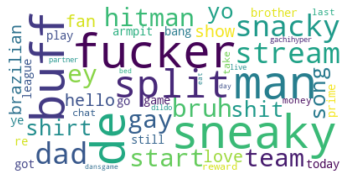

In [54]:
%matplotlib inline
from os import path
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Wordcloud para comentários
text = ' '.join(dataset_pproc.comment.values)# retira uma lista com os valores contidos no dataset
words = text.split()
text = (" ".join(sorted(set(words),key=words.index)))#organiza e seleciona apenas palavras unicas da lista
text = re.sub(r'[^A-Za-z0-9 ]+','', text)# substitui possíveis ruídos no texto

#print(text)
# Gerando a imagem wordcloud
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=55,background_color="white", max_words=50).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Modelagem de Tópicos

In [234]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Função para vetorização do dataset
def transformData(data, fieldName, my_tokenizer, weight):
    
    if weight == "TP":
        vectorizer = CountVectorizer(tokenizer=my_tokenizer, binary=True)
        X = vectorizer.fit_transform(data[fieldName])
    
    elif weight == "TF":
        vectorizer = CountVectorizer(tokenizer=my_tokenizer)
        X = vectorizer.fit_transform(data[fieldName])
        
    elif weight == "TFIDF":
        vectorizer = TfidfVectorizer(tokenizer=my_tokenizer)
        X = vectorizer.fit_transform(data[fieldName])

    return (vectorizer, X)

In [235]:
# Chamando função para vetorizar o dataset
vectorizer, X = transformData(dataset_pproc, fieldName="comment", my_tokenizer=tokenize, weight="TFIDF")

In [236]:
#print(vectorizer.get_feature_names())

In [237]:
#variável contento as caracteristicas extraídas do dataset
tfidf_feature_names= vectorizer.get_feature_names()

In [238]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

#Função para mostrar os principais tópicos
def display_topics(model, feature_names, top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Tópico %d: " % (topic_idx) +
                " ".join([feature_names[i]
                        for i in topic.argsort()[:-top_words -2:-1]]))

topics = 5
top_words = 5
# Exexutando os modelos LDA e LSA 
lda = LatentDirichletAllocation(n_components=topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(X)
lsa = TruncatedSVD(n_components=topics, algorithm='randomized', n_iter=5, random_state=1).fit(X)

#Mostrando os resultados para cada modelo
print('-------------------------------------------------------')
print('Modelo LDA')
print('-------------------------------------------------------')
print('Número de Tópicos = 5')
print('Número de Palavras = 5')
print('-------------------------------------------------------')
display_topics(lda, tfidf_feature_names, top_words)
print('-------------------------------------------------------')
print('Modelo LSA')
print('-------------------------------------------------------')
print('Número de Tópicos = 5')
print('Número de Palavras = 5')
print('-------------------------------------------------------')
display_topics(lsa, tfidf_feature_names, top_words)
print('-------------------------------------------------------')

-------------------------------------------------------
Modelo LDA
-------------------------------------------------------
Número de Tópicos = 5
Número de Palavras = 5
-------------------------------------------------------
Tópico 0:  man like dont one stream
Tópico 1:  go get good lol please
Tópico 2:  moe game time icecold points
Tópico 3:  subscribed chat trklegend nice twitch
Tópico 4:  better shit win tyler faker
-------------------------------------------------------
Modelo LSA
-------------------------------------------------------
Número de Tópicos = 5
Número de Palavras = 5
-------------------------------------------------------
Tópico 0:  play game chat get like
Tópico 1: lol play game head go like
Tópico 2: lol subscribed twitch prime months trklegend
Tópico 3: play subscribed twitch prime game months
Tópico 4: chat head shared rewards others good
-------------------------------------------------------


# Análise de Sentimentos

In [239]:
from polyglot.text import Text
import matplotlib.pyplot as plt


#print("{:<16}{}".format("Word", "Polarity")+"\n"+"-"*30)

def sent_analize_pos(text):
    Positivos = []
    for w in text.words:
        #print(w.polarity)
        if (w.polarity == 1):
            Positivos.append("{:<16}{:>2}".format(w, w.polarity))
    return Positivos

def sent_analize_neg(text):
    Negativos = []
    for w in text.words:
        #print(w.polarity)
        if (w.polarity == -1):
            Negativos.append("{:<16}{:>2}".format(w, w.polarity))
    return Negativos

def sent_analize_neutros(text):
    Neutros = []
    for w in text.words:
        #print(w.polarity)
        if (w.polarity == 0):
            Neutros.append("{:<16}{:>2}".format(w, w.polarity))
    return Neutros
text = Text(' '.join(dataset_pproc.comment.values))
Positivos = sent_analize_pos(text)
Negativos = sent_analize_neg(text)
Neutros = sent_analize_neutros(text)
Num_pos= len(Positivos)
Num_neg= len(Negativos) 
Num_neutros= len(Neutros)

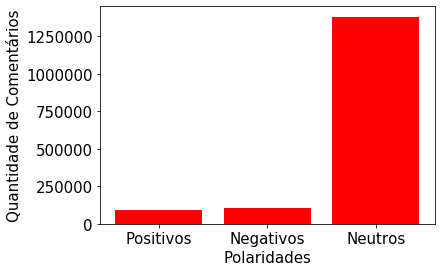

 Positivos: 90607
 Negativos: 104366 
 Neutros: 1380049


In [240]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positivos', 'Negativos', 'Neutros']
sizes = [Num_pos, Num_neg, Num_neutros]
plt.rcParams.update({'font.size':15})
plt.bar(labels,sizes,color='red')
plt.xticks(labels)
plt.ylabel('Quantidade de Comentários')
plt.xlabel('Polaridades')
#plt.title('Análise de Sentimentos dos Comentários')

plt.show()


print(" Positivos: %d\n" % Num_pos,
      "Negativos: %d \n" % Num_neg,
      "Neutros: %d" % Num_neutros)

# Detecção de HateSpeech

In [241]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
from hatesonar import Sonar

# Função que utiliza o hatesonar para classificar os comentãrios linha por linha em hate speech, offensive language e neither
# A função salva os resultados em um arquivo .csv
def detect_hs(text):
    warnings.filterwarnings(action='ignore')
    sonar = Sonar()
    with open('HS_detection/TwitchDataset_HS_detect_saved.csv','w',encoding='utf8') as f:
        titles = f"comment\tTop_Class\tHateSpeech_Confidence\tOfensive_Language_Confidence\tNeither_Confidence\n"
        f.write(titles)
        temp_list = []
        for dado in text.itertuples():
            dado = dado.comment
            dit = sonar.ping(dado)# método que faz a classificação: o resultado é um dicionário contendo os resultad
            texto = dit['text']
            classif = dit['top_class']
            classes = dit['classes']
            hs_confidence = classes[0]['confidence']
            #hs_class = classes[0]['class_name']
            ol_confidence = classes[1]['confidence']
            #ol_class = classes[1]['class_name']
            neither_confidence = classes[2]['confidence']
            #neither_class = classes[2]['class_name']
            temp_list.append(texto + classif + str(hs_confidence)  + str(ol_confidence) + str(neither_confidence))

            f.write(f"{texto}\t{classif}\t{hs_confidence}\t{ol_confidence}\t{neither_confidence}\n")
    f.close()

In [242]:
# Executando a função de detecção de hate speech
file = 'PreprocessDataset/TwitchDataset_pproc_Dataset.csv'# caminho para o arquivo preprocessado desejado
df = pd.read_csv(file,sep='\t')
df=df.dropna(subset=['comment'])
df =detect_hs(df)

### Modelagem de Tópicos dos Hate Speech, Offensive Language

In [285]:
import pandas as pd

def topic_mod_hs(text):
    hate_speech = []
    of_lang = []
    for dado in text.itertuples():
        dados = dado.Top_Class
        commt= dado.comment
        if (dados == 'hate_speech'):
            hate_speech.append(commt)
            
        elif(dados == 'offensive_language'):
            of_lang.append(commt)

    return hate_speech, of_lang

In [286]:
f = 'HS_detection/TwitchDataset_HS_detect_saved.csv'
mt_df = pd.read_csv(f,sep='\t')
tm_hs,tm_ol = topic_mod_hs(mt_df)

In [287]:
d_hs = {'Hate Speech':tm_hs}
d_ol = {'Offensive_Language':tm_ol}
df_hs = pd.DataFrame(d_hs,columns=['Hate Speech'])
df_ol = pd.DataFrame(d_ol,columns=['Offensive_Language'])

In [288]:
vect, y = transformData(df_hs, fieldName="Hate Speech", my_tokenizer=tokenize, weight="TFIDF")
vect2, Z = transformData(df_ol, fieldName="Offensive_Language", my_tokenizer=tokenize, weight="TFIDF")

In [289]:
tf_idf_hs= vect.get_feature_names()
tf_idf_ol = vect2.get_feature_names()

In [290]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

#Função para mostrar os principais tópicos
def display_topics(model, feature_names, top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Tópico %d: " % (topic_idx) +
                " ".join([feature_names[i]
                        for i in topic.argsort()[:-top_words -2:-1]]))

topics = 5
top_words = 5
# Exexutando os modelos LDA e LSA 
lda = LatentDirichletAllocation(n_components=topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(y)
lsa = TruncatedSVD(n_components=topics, algorithm='randomized', n_iter=5, random_state=1).fit(y)

#Mostrando os resultados para cada modelo
print('-------------------------------------------------------')
print('Hate Speech')
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Modelo LDA')
print('-------------------------------------------------------')
print('Número de Tópicos = 5')
print('Número de Palavras = 5')
print('-------------------------------------------------------')
display_topics(lda, tf_idf_hs, top_words)
print('-------------------------------------------------------')
print('Modelo LSA')
print('-------------------------------------------------------')
print('Número de Tópicos = 5')
print('Número de Palavras = 5')
print('-------------------------------------------------------')
display_topics(lsa, tf_idf_hs, top_words)
print('-------------------------------------------------------')
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

#Função para mostrar os principais tópicos
def display_topics2(model, feature_names, top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Tópico %d: " % (topic_idx) +
                " ".join([feature_names[i]
                        for i in topic.argsort()[:-top_words -2:-1]]))

topics = 5
top_words = 5
# Exexutando os modelos LDA e LSA 
lda = LatentDirichletAllocation(n_components=topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(z)
lsa = TruncatedSVD(n_components=topics, algorithm='randomized', n_iter=5, random_state=1).fit(z)
print('-------------------------------------------------------')
print('Offensive Language')
print('-------------------------------------------------------')
print('Modelo LDA')
print('-------------------------------------------------------')
print('Número de Tópicos = 5')
print('Número de Palavras = 5')
print('-------------------------------------------------------')
display_topics2(lda, tf_idf_ol, top_words)
print('-------------------------------------------------------')
print('Modelo LSA')
print('-------------------------------------------------------')
print('Número de Tópicos = 5')
print('Número de Palavras = 5')
print('-------------------------------------------------------')
display_topics2(lsa, tf_idf_ol, top_words)
print('-------------------------------------------------------')

-------------------------------------------------------
Hate Speech
-------------------------------------------------------
-------------------------------------------------------
Modelo LDA
-------------------------------------------------------
Número de Tópicos = 5
Número de Palavras = 5
-------------------------------------------------------
Tópico 0:  kill white racist hate people
Tópico 1: fat fuck ass  ugly see
Tópico 2: kill  dont moe em widepeepohappy
Tópico 3: gay  streamer best gaypride tfblade
Tópico 4: jew nexus trailer watch annie retards
-------------------------------------------------------
Modelo LSA
-------------------------------------------------------
Número de Tópicos = 5
Número de Palavras = 5
-------------------------------------------------------
Tópico 0:  kill gay hate white racist
Tópico 1: gay streamer best tfblade gaypride lol
Tópico 2: kill gay head double widepeepohappy em
Tópico 3: racist chat kill streamer rush gay
Tópico 4: white racist kill people s

### Visualização dos Resultados da Detecção de Hate Speech por Streamer

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Lista com os caminhos para os arquivos de detecção de hate speech de cada streamer
file = ['HS_detection/C9sneaky_HS_detect_saved.csv','HS_detection/DoubleLift_HS_detect_saved.csv','HS_detection/foggedftw2_HS_detect_saved.csv',
        'HS_detection/lolTyler1_HS_detect_saved.csv','HS_detection/Nightblue3_HS_detect_saved.csv','HS_detection/Rush_HS_detect_saved.csv',
        'HS_detection/TFBlade_HS_detect_saved.csv','HS_detection/Trick2g_HS_detect_saved.csv','HS_detection/TSM_Bjergsen_HS_detect_saved.csv',
        'HS_detection/Yassuo_HS_detect_saved.csv','HS_detection/TwitchDataset_HS_detect_saved.csv']




# Função para contagem das classificações por streamer e de todo o dataset

def hs_for_stmrs(text):
    hate_speech = []
    of_lang = []
    neither= []
    total = 0
    for dado in text.itertuples():
        dados = dado.Top_Class
        commt= dado.comment
        if (dados == 'hate_speech'):
            hate_speech.append(dados+':'+commt)
            num_hs = len(hate_speech)
           
        elif(dados == 'offensive_language'):
            of_lang.append(dados+':'+commt)
            num_of_lg = len(of_lang)

        elif(dados == 'neither'):
            neither.append(dados+':'+commt)
            num_nt = len(neither)
           
    total = (num_hs+num_of_lg+num_nt)
    return num_hs,num_of_lg,num_nt,total

# Iteração sobre a lista de caminhos de arquivos
for i in file:
    if (i== 'HS_detection/C9sneaky_HS_detect_saved.csv'):
        strm1  = 'C9sneaky'
        df2= pd.read_csv(i,sep='\t')
        hs1,ol1,nt1,tot1 = hs_for_stmrs(df2)
    
    elif (i== 'HS_detection/DoubleLift_HS_detect_saved.csv'):
        strm2  = 'DoubleLift'
        df2 = pd.read_csv(i,sep='\t')
        hs2,ol2,nt2,tot2 = hs_for_stmrs(df2)

    elif (i== 'HS_detection/foggedftw2_HS_detect_saved.csv'):
        strm3  = 'foggedftw2'
        df2 = pd.read_csv(i,sep='\t')
        hs3,ol3,nt3,tot3 = hs_for_stmrs(df2)

    elif (i== 'HS_detection/lolTyler1_HS_detect_saved.csv'):
        strm4  = 'lolTyler1'
        df2 = pd.read_csv(i,sep='\t')
        hs4,ol4,nt4,tot4 = hs_for_stmrs(df2)

    elif (i== 'HS_detection/Nightblue3_HS_detect_saved.csv'):
        strm5  = 'Nightblue3'
        df2 = pd.read_csv(i,sep='\t')
        hs5,ol5,nt5,tot5 = hs_for_stmrs(df2)

    elif (i== 'HS_detection/Rush_HS_detect_saved.csv'):
        strm6  = 'Rush'
        df2 = pd.read_csv(i,sep='\t')
        hs6,ol6,nt6,tot6 = hs_for_stmrs(df2)

    elif (i== 'HS_detection/TFBlade_HS_detect_saved.csv'):
        strm7   = 'TFBlade'
        df2 = pd.read_csv(i,sep='\t')
        hs7,ol7,nt7,tot7 = hs_for_stmrs(df2)
            
    elif (i== 'HS_detection/Trick2g_HS_detect_saved.csv'):
        strm8 = 'Trick2g'
        df2 = pd.read_csv(i,sep='\t')
        hs8,ol8,nt8,tot8 = hs_for_stmrs(df2)

    elif (i== 'HS_detection/TSM_Bjergsen_HS_detect_saved.csv'):
        strm9  = 'TSM_Bjergsen'
        df2 = pd.read_csv(i,sep='\t')
        hs9,ol9,nt9,tot9 = hs_for_stmrs(df2)

    elif (i== 'HS_detection/Yassuo_HS_detect_saved.csv'):
        strm10 = 'Yassuo'
        df2 = pd.read_csv(i,sep='\t')
        hs10,ol10,nt10,tot10 = hs_for_stmrs(df2)
    
    elif (i== 'HS_detection/TwitchDataset_HS_detect_saved.csv'):# caminho para todo o dataset com todos os comentários
        strm11 = 'TwitchDataset_All Data'
        df2 = pd.read_csv(i,sep='\t')
        hs11,ol11,nt11,tot11 = hs_for_stmrs(df2)

In [2]:
# Unindo os resultados em um lista para transformá-los em um dataframe pandas
qt_hs=[hs1,hs2,hs3,hs4,hs5,hs6,hs7,hs8,hs9,hs10]
strms= [strm1,strm2,strm3,strm4,strm5,strm6,strm7,strm8,strm9,strm10]
qt_ol =[ol1,ol2,ol3,ol4,ol5,ol6,ol7,ol8,ol9,ol10] 
qt_nt =[nt1,nt2,nt3,nt4,nt5,nt6,nt7,nt8,nt9,nt10]
tot =[tot1,tot2,tot3,tot4,tot5,tot6,tot7,tot8,tot9,tot10]
dict_Hs = {'Streamer':strms,'Hate Speech':qt_hs,'Offensive Language':qt_ol, 'Neither':qt_nt,'Total':tot}
dict_Alldata = {'All Twitch Dataset':[strm11],'Hate Speech':[hs11],'Offensive Language':[ol11], 'Neither':[nt11],'Total':[tot11]}
# Transformando os resultados em um dataframe pandas
df12 = pd.DataFrame(dict_Hs,columns=['Streamer','Hate Speech','Offensive Language','Neither','Total'])
df12 = df12.sort_values(by='Hate Speech',ascending=False)
df13 = pd.DataFrame(dict_Alldata,columns=['All Twitch Dataset','Hate Speech','Offensive Language','Neither','Total'])
# Salvando resultados em um arquivo .csv
#df12.to_csv (r'hs_strmrs.csv', index = None, header=True,sep='\t',)
#df13.to_csv (r'hs_alldataset.csv', index = None, header=True,sep='\t',)


In [3]:
df12

,Streamer,Hate Speech,Offensive Language,Neither,Total
0,C9sneaky,517,3396,59842,63755
6,TFBlade,491,3491,98384,102366
3,lolTyler1,482,7997,144030,152509
4,Nightblue3,249,1247,32021,33517
9,Yassuo,201,3321,61777,65299
5,Rush,164,757,30850,31771
1,DoubleLift,73,913,22898,23884
7,Trick2g,55,1130,28386,29571
2,foggedftw2,54,1081,27713,28848
8,TSM_Bjergsen,12,99,3682,3793


In [43]:
df13

,All Twitch Dataset,Hate Speech,Offensive Language,Neither,Total
0,TwitchDataset_All Data,2497,19104,461676,483277


### Visualizando em um Gráfico de Barras

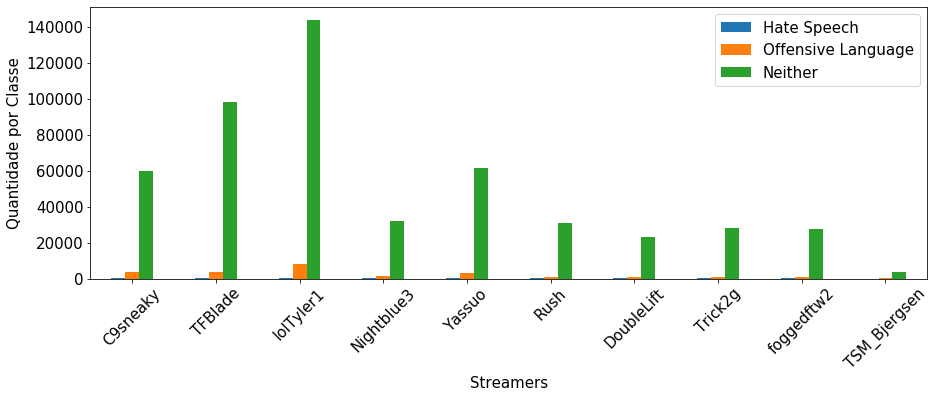

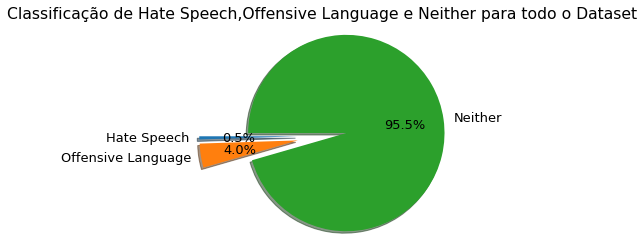

 Hate Speech: 2497
 Offensive Language: 19104 
 Neither: 461676


In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':15})
# Plotando gráfico de classificação por streamer
ax=df12[['Hate Speech','Offensive Language','Neither']].plot(figsize=(15,5),kind='bar')
ax.set_xticklabels(df12['Streamer'], rotation=45)
plt.legend(loc='best')
plt.xlabel('Streamers')
plt.ylabel('Quantidade por Classe')
#plt.title('Classificação de Hate Speech, Offensive Language e Neither por Streamer')

#Plotando gráfico de classificação de todo o dataset
#ax2=df13[['Hate Speech','Offensive Language','Neither']].plot(figsize=(10,5),kind='bar')
#ax2.set_xticklabels(df13['All Twitch Dataset'], rotation=0)
#plt.legend(loc='best')
#plt.xlabel('Comentários de todo o Dataset')
#plt.ylabel('Quantidade por Classe')
#plt.title('Classificação de Hate Speech,Offensive Language e Neither para todo o Dataset')

#print(" Hate Speech: %d\n" % hs11,
      #"Offenseive Language: %d \n" % ol11,
      #"Neither: %d" % nt11)
labels = 'Hate Speech','Offensive Language','Neither',
sizes = [hs11, ol11, nt11]
explode = (0.3, 0.3, 0.2)  # Explode all sides
plt.rcParams.update({'font.size':13})
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Classificação de Hate Speech,Offensive Language e Neither para todo o Dataset')

plt.show()


print(" Hate Speech: %d\n" % hs11,
      "Offensive Language: %d \n" % ol11,
      "Neither: %d" % nt11)